In [1]:
#Basics of Probability

import random

heads = 0
tails = 0
for _ in range(10000):
    if random.choice(['H', 'T']) == 'H':
        heads += 1
    else:
        tails += 1

print("Coin Toss - Heads Probability:", heads / 10000)
print("Coin Toss - Tails Probability:", tails / 10000)

sum_7 = 0
trials = 10000
for _ in range(trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        sum_7 += 1

print("Probability of sum 7 when rolling two dice:", sum_7 / trials)

Coin Toss - Heads Probability: 0.5067
Coin Toss - Tails Probability: 0.4933
Probability of sum 7 when rolling two dice: 0.1615


In [2]:
#Problem 2
def estimate_at_least_one_six(trials):
    success = 0
    for _ in range(trials):
        for _ in range(10):
            if random.randint(1, 6) == 6:
                success += 1
                break
    return success / trials

print("Estimated Probability of at least one '6' in 10 rolls:", estimate_at_least_one_six(10000))

Estimated Probability of at least one '6' in 10 rolls: 0.8369


In [3]:
#Conditional Probability and Bayes' Theorem

import random

colors = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8
draws = []
for _ in range(1000):
    draws.append(random.choice(colors))

total_blue = 0
red_given_blue = 0
for i in range(1, len(draws)):
    if draws[i - 1] == 'blue':
        total_blue += 1
        if draws[i] == 'red':
            red_given_blue += 1

p_red_given_blue = red_given_blue / total_blue if total_blue > 0 else 0

total_red = draws.count('red')
total_red_followed_by_blue = 0
for i in range(1, len(draws)):
    if draws[i] == 'blue' and draws[i - 1] == 'red':
        total_red_followed_by_blue += 1

p_blue_given_red = total_red_followed_by_blue / total_red if total_red > 0 else 0
p_red = total_red / len(draws)
p_blue = draws.count('blue') / len(draws)
bayes_estimate = (p_blue_given_red * p_red) / p_blue if p_blue > 0 else 0

print("P(Red | Blue) from simulation:", p_red_given_blue)
print("P(Red | Blue) using Bayes' Theorem:", bayes_estimate)


P(Red | Blue) from simulation: 0.2409090909090909
P(Red | Blue) using Bayes' Theorem: 0.2590909090909091


In [4]:
#Random Variables and Discrete Probability

import numpy as np

values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.40]
sample = np.random.choice(values, size=1000, p=probabilities)

mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print("Empirical Mean:", mean)
print("Empirical Variance:", variance)
print("Empirical Standard Deviation:", std_dev)

Empirical Mean: 2.128
Empirical Variance: 0.6376160000000002
Empirical Standard Deviation: 0.7985086098471326


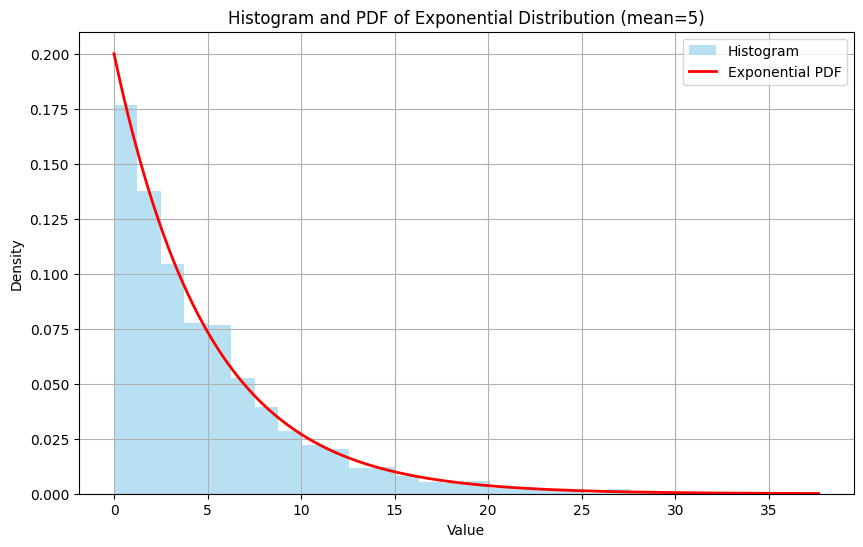

In [5]:
#Continuous Random Variables

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

scale = 5
samples = np.random.exponential(scale=scale, size=2000)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')

x = np.linspace(0, np.max(samples), 1000)
pdf = expon.pdf(x, loc=0, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label='Exponential PDF')

plt.title('Histogram and PDF of Exponential Distribution (mean=5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


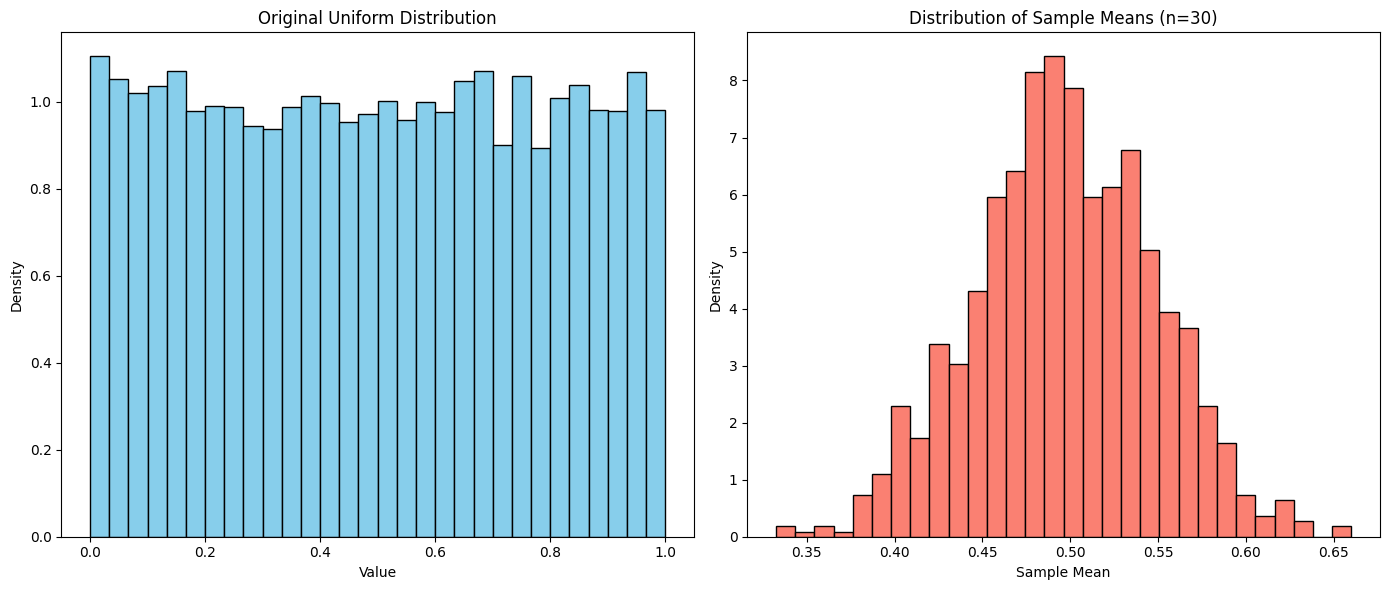

In [6]:
#Central Limit Theorem
import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(low=0, high=1, size=10000)
sample_means = [np.mean(np.random.choice(data, size=30, replace=False)) for _ in range(1000)]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, density=True, color='salmon', edgecolor='black')
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

plt.tight_layout()
plt.show()